# 인공지능이론 및 프로그래밍 실습강의 5

# pandas

reference:
    https://pandas.pydata.org/

# scikit-learn

reference:
    https://scikit-learn.org/stable/index.html


## 1. pandas
**pandas** is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

In [ ]:
import numpy as np
import pandas as pd

### Series

In [ ]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

In [ ]:
s

In [ ]:
s.index

In [ ]:
pd.Series(np.random.randn(5))

In [ ]:
 d = {'b': 1, 'a': 0, 'c': 2}

In [ ]:
pd.Series(d)

In [ ]:
s.to_numpy()

In [ ]:
s['a']

In [ ]:
'e' in s

In [ ]:
'f' in s

In [ ]:
s.get('e')

In [ ]:
s.get('f')

In [ ]:
s['f']

In [ ]:
sin_series = pd.Series(np.sin(np.linspace(0, 4*np.pi, 100)))

In [ ]:
sin_series

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
sin_series.plot()

### Dataframe

In [ ]:
data = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
        'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

In [ ]:
pd.DataFrame(data, index=['d', 'b', 'a'])

In [ ]:
pd.DataFrame(data, index=['d', 'b', 'a'], columns=['two', 'three'])

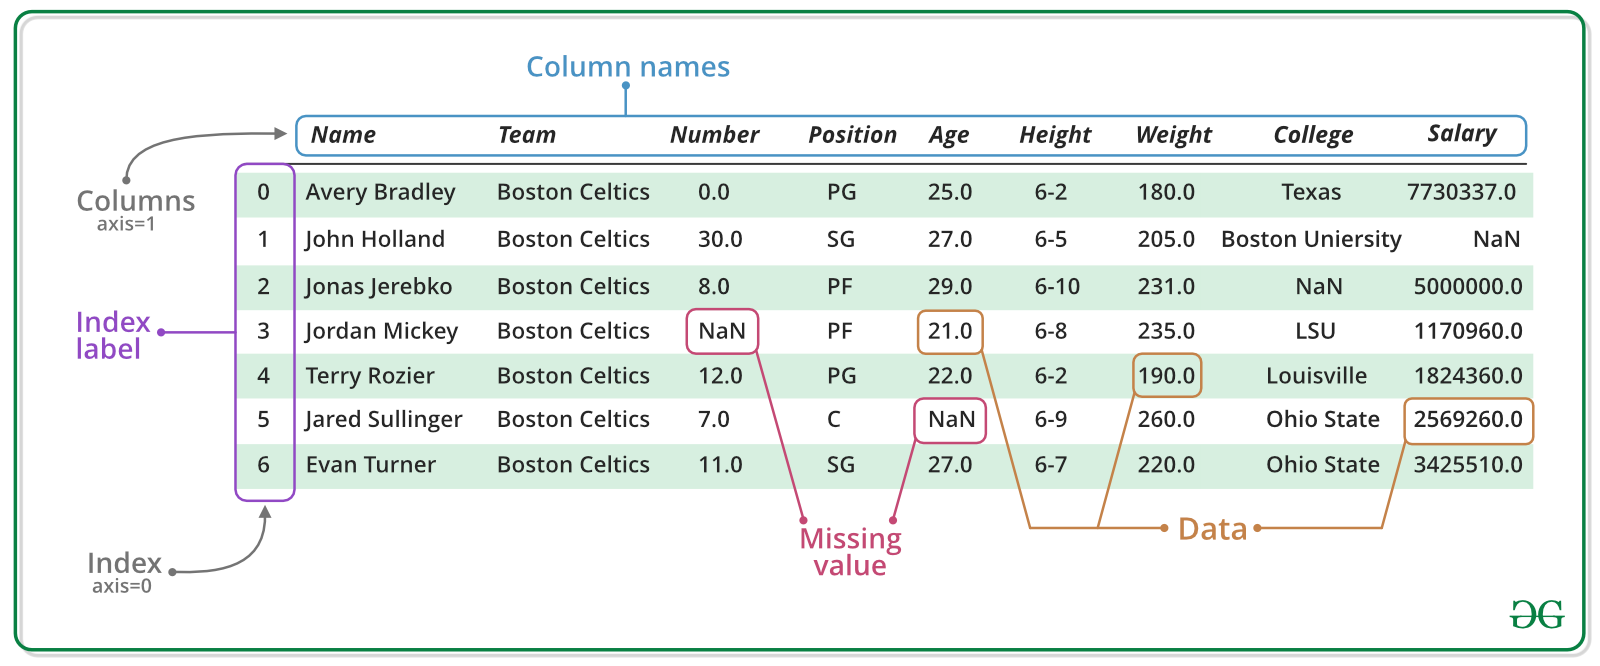

In [ ]:
df.index

In [ ]:
df.columns

In [ ]:
df['one']

In [ ]:
df['three'] = df['one'] * df['two']

In [ ]:
df

In [ ]:
df['flag'] = df['one'] > 2

In [ ]:
df

In [ ]:
del df['two']

In [ ]:
df

In [ ]:
three = df.pop('three')

In [ ]:
three

In [ ]:
df

In [ ]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [ ]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

In [ ]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=0, na_values=['NA'])

## 2.scikit-learn


*   Simple and efficient tools for predictive data analysis
*   Accessible to everybody, and reusable in various contexts
*   Built on NumPy, SciPy, and matplotlib
*   Open source, commercially usable - BSD license



### linear regression

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [ ]:
help(datasets.load_diabetes)

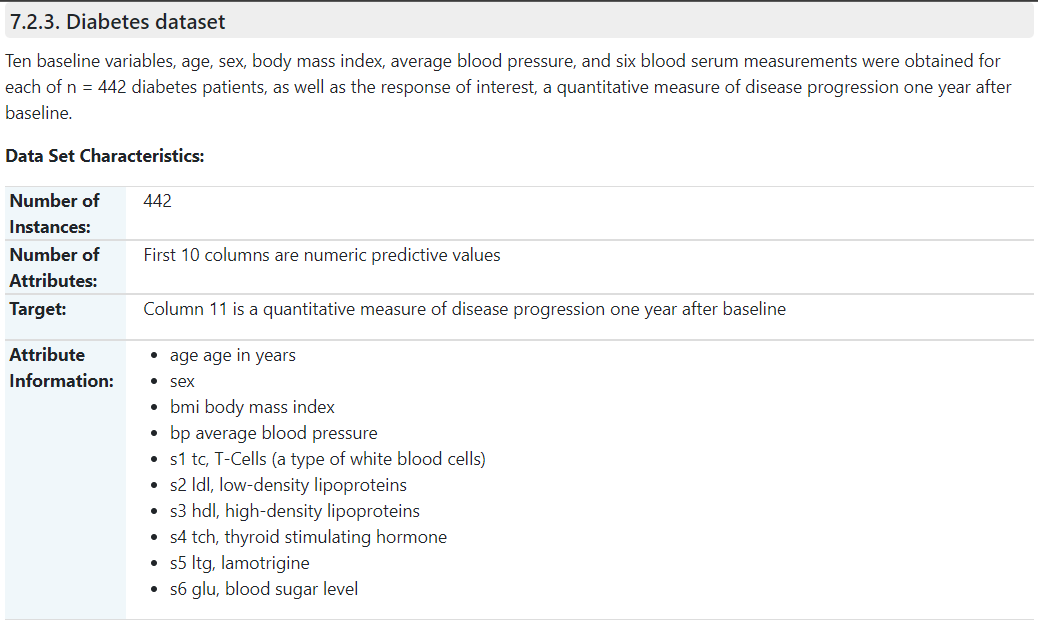

In [ ]:
diabetes_X

In [ ]:
diabetes_X[0]

In [ ]:
diabetes_X[:,0]

In [ ]:
diabetes_X_feautre = diabetes_X[:, np.newaxis, 0]

In [ ]:
diabetes_X_train = diabetes_X_feautre[:-20]
diabetes_X_test = diabetes_X_feautre[-20:]

In [ ]:
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [ ]:
regr = linear_model.LinearRegression()

In [ ]:
regr.fit(diabetes_X_train, diabetes_y_train)

In [ ]:
diabetes_y_pred = regr.predict(diabetes_X_test)

In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
diabetes_y_train

In [ ]:
diabetes_X_feautre = diabetes_X[:, np.newaxis, 9]
diabetes_X_train = diabetes_X_feautre[:-20]
diabetes_X_test = diabetes_X_feautre[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
diabetes_y_pred = regr.predict(diabetes_X_test)

In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### logistic regression

#### titanic data set

reference:
    https://www.kaggle.com/c/titanic/data

In [ ]:
df_titanic_train = pd.read_csv("titanic_train.csv")

In [ ]:
df_titanic_train

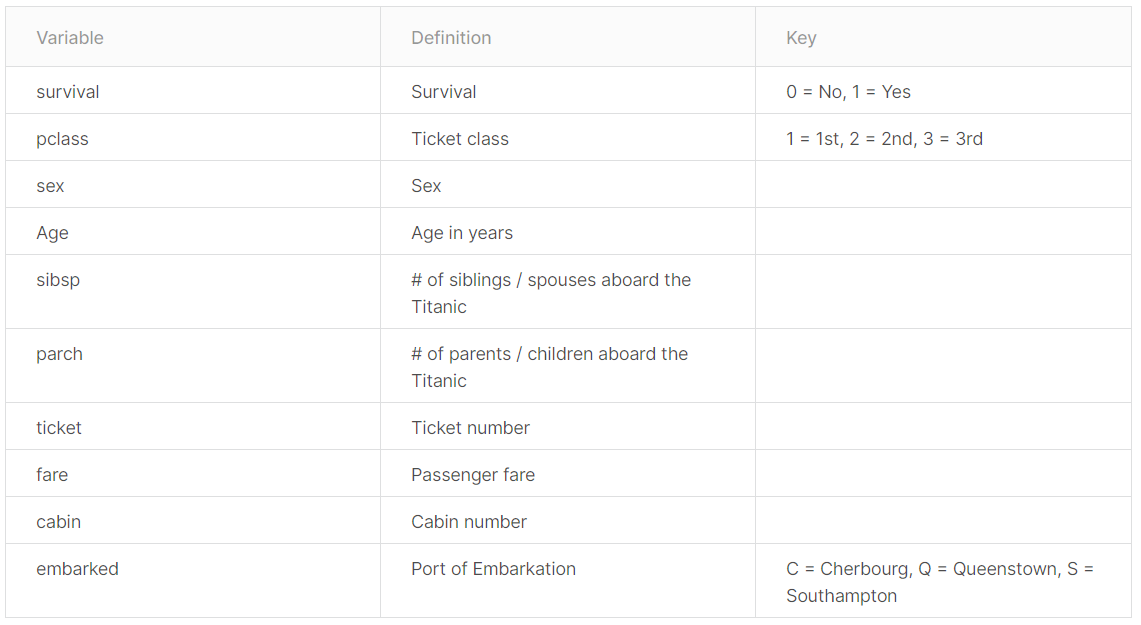

#### data visualization

In [ ]:
cnt_survived = df_titanic_train[df_titanic_train['Survived']==1]['Sex'].value_counts()
cnt_dead = df_titanic_train[df_titanic_train['Survived']==0]['Sex'].value_counts()
sex_df = pd.DataFrame([cnt_survived, cnt_dead])
sex_df.index = ['Survived', 'Dead']
sex_df.plot(kind='bar', stacked=True)

#### data preprocessing

In [ ]:
df_titanic_train['Sex'] = df_titanic_train['Sex'].map({'female':1,'male':0})

In [ ]:
#결측치 회복, NaN 

df_titanic_train['Age'].fillna(value=df_titanic_train['Age'].mean(), inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

titanic_diabetes_X_feautre = df_titanic_train[['Sex', 'Age', 'Pclass']]

# data를 0과 1사이의 value를 가지도록 정규화시킨다.
titanic_database_X_train   = scaler.fit_transform(titanic_diabetes_X_feautre)

In [ ]:
titanic_database_X_train

In [ ]:
titanic_database_Y_train = df_titanic_train['Survived']

#### make a regression model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(titanic_database_X_train, titanic_database_Y_train)

In [ ]:
print(model.score(titanic_database_X_train, titanic_database_Y_train))
# 80% 정확도로 생존확률 예측가능

#### test a regression model

In [ ]:
## Age 22 -> -0.5924806 // 38 -> 0.63878901 // 26 -> -0.2846632
print(titanic_database_X_train[:10,1])

## Pclass 3 -> 0.82737724 // 1 -> -1.56610693
print(titanic_database_X_train[:10,2])


In [ ]:
#Sex, Age, Pclass -> scaled value
Jack = np.array([0, -0.5924806, 0.82737724]) # male, 22, 3
Rose = np.array([1, -0.8233436520239081, -1.56610693]) # female, 19, 1

print(model.predict_proba((Jack, Rose)))

### KNN (K-Nearest Neighbor) classfication

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5, p=2)
knn_model.fit(titanic_database_X_train, titanic_database_Y_train)

In [ ]:
print(knn_model.score(titanic_database_X_train, titanic_database_Y_train))

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
plt.title("Titanic data set")
ax.scatter(titanic_database_X_train[:, 0], titanic_database_X_train[:, 1],  titanic_database_X_train[:, 2]) # c: marker의 색깔설정, s: marker의 크기
# df_titanic_train[['Sex', 'Age', 'Pclass']]
ax.set_xlabel('Sex')
ax.set_ylabel('Age')
ax.set_zlabel('Pclass')
plt.show()
# KNN에 적합한 모델일까?

#### Another data set - Iris

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
      
def plot_decision_regions(x_train, y_train, x_test, y_test, classifier, resolution=0.1):
    plt.figure(figsize=(8, 6))
    # marker와 colormap 설정
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y_train))])

    #  decision region 가시화
    x1_min, x1_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    x2_min, x2_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    X = np.vstack((x_train, x_test))
    y = np.hstack((y_train, y_test))
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.

    plt.scatter(x_test[:, 0],
                x_test[:, 1],
                c='',
                edgecolor='black',
                alpha=1.0,
                linewidth=1.5,
                marker='o',
                s=100, 

                label='test set')

Reference: 
    https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
irisX = iris.data[:, [2, 3]] # 3번쨰와 4번째 column의 feature들만을 이용할것
irisY = iris.target

import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["label"]=iris.target
iris_df
#sepal: 꽃받침, petal: 꽃잎

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


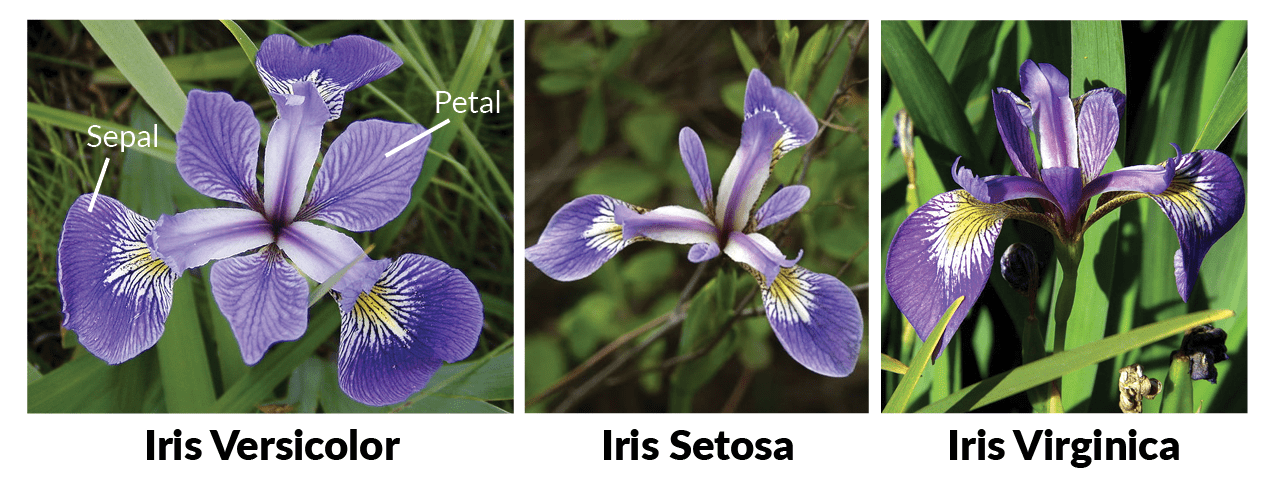

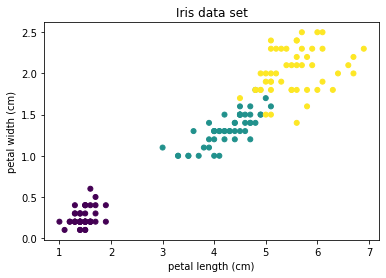

In [ ]:
plt.title("Iris data set")
plt.scatter(irisX[:, 0], irisX[:, 1], marker='o', c=irisY, s=25) # c: marker의 색깔설정, s: marker의 크기
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
irisX_train, irisX_test, irisY_train, irisY_test = train_test_split(irisX, irisY, test_size=0.3, random_state=1, stratify=irisY)


from sklearn.neighbors import KNeighborsClassifier


knn_iris = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn_iris.fit(irisX_train, irisY_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


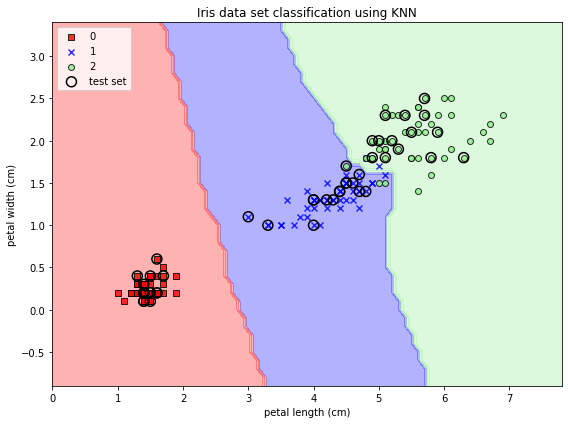

In [ ]:
plot_decision_regions(irisX_train, irisY_train, irisX_test, irisY_test, knn_iris)

plt.title("Iris data set classification using KNN")
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
print(f"train acc: {knn_iris.score(irisX_train, irisY_train)}")
print(f"test acc: {knn_iris.score(irisX_test, irisY_test)}")

train acc: 0.9619047619047619
test acc: 0.9777777777777777


In [ ]:
for k in range(1, 25, 2):
    knn_iris = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
    knn_iris.fit(irisX_train, irisY_train)
    print(k)
    print(f"train acc: {knn_iris.score(irisX_train, irisY_train)}")
    print(f"test acc: {knn_iris.score(irisX_test, irisY_test)}")

1
train acc: 0.9904761904761905
test acc: 0.9777777777777777
3
train acc: 0.9904761904761905
test acc: 0.9777777777777777
5
train acc: 0.9619047619047619
test acc: 0.9777777777777777
7
train acc: 0.9619047619047619
test acc: 0.9777777777777777
9
train acc: 0.9523809523809523
test acc: 0.9777777777777777
11
train acc: 0.9523809523809523
test acc: 0.9777777777777777
13
train acc: 0.9619047619047619
test acc: 0.9777777777777777
15
train acc: 0.9714285714285714
test acc: 0.9777777777777777
17
train acc: 0.9619047619047619
test acc: 0.9777777777777777
19
train acc: 0.9428571428571428
test acc: 0.9555555555555556
21
train acc: 0.9428571428571428
test acc: 0.9555555555555556
23
train acc: 0.9523809523809523
test acc: 0.9555555555555556


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


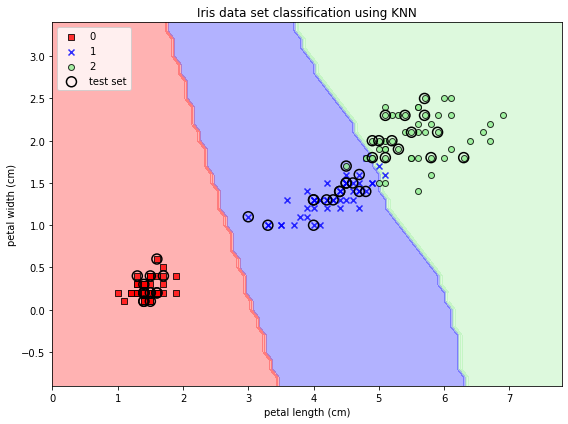

In [ ]:
knn_iris = KNeighborsClassifier(n_neighbors=21, p=2, metric='minkowski')
knn_iris.fit(irisX_train, irisY_train)

plot_decision_regions(irisX_train, irisY_train, irisX_test, irisY_test, knn_iris)

plt.title("Iris data set classification using KNN")
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


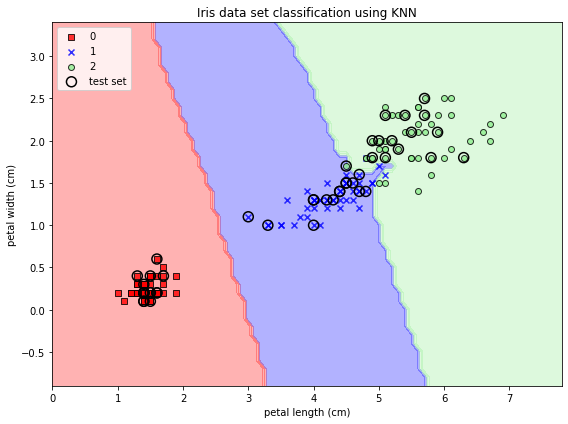

In [ ]:
knn_iris = KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski')
knn_iris.fit(irisX_train, irisY_train)

plot_decision_regions(irisX_train, irisY_train, irisX_test, irisY_test, knn_iris)

plt.title("Iris data set classification using KNN")
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()